<a href="https://colab.research.google.com/github/mariaareig/visualizacion-de-datos/blob/main/AG3300623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# importar las liberías en Python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import requests
import timeit

In [74]:
# cargamos los datos de los pasajeros del Titanic que estan en un github (a través de una url)
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [75]:
# información del dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [76]:
# contar los datos nulos para cada variable
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [77]:
# % de valores nulos
(titanic.isnull().sum()/(len(titanic)))*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [78]:
# renombrar las columnas class = clase y fare =tarifa
titanic.rename(columns={'class':'clase', 'fare':'tarifa'}, inplace=True)

In [79]:
# muestra los valores distintos para clase
titanic.clase.unique()

array(['Third', 'First', 'Second'], dtype=object)

In [80]:
# añadir nuevas columnas: is_old, is_baby
def is_old_function(row):
  return row['age']>60

titanic['is_old'] = titanic.apply(is_old_function, axis='columns')
titanic.eval('is_baby = age<15', inplace = True)

In [81]:
# definir una nueva variabke numérica: class_num
def class_num_func(row):
  Clase={'First':1, 'Second':2, 'Third':3}
  return Clase[row.clase]

titanic['class_num'] = titanic.apply(class_num_func, axis='columns')

In [82]:
# consultar con condiciones
titanic[
    (titanic.sex == 'female') &
    (titanic['clase'].isin(['First', 'Second'])) &
    (titanic.age>45) &
    (titanic.survived == 0)
]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
772,0,2,female,57.0,0,0,10.5000,S,Second,woman,False,E,Southampton,no,True,False,False,2


<Axes: xlabel='pclass', ylabel='count'>

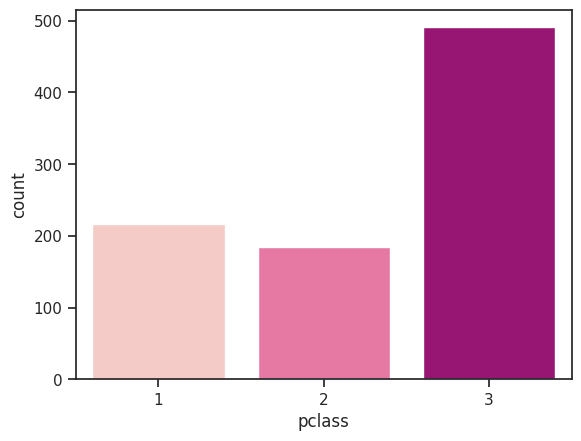

In [83]:
# distribución de las clases
sns.set_palette("RdPu", n_colors=3)
sns.countplot(x="pclass", data=titanic)

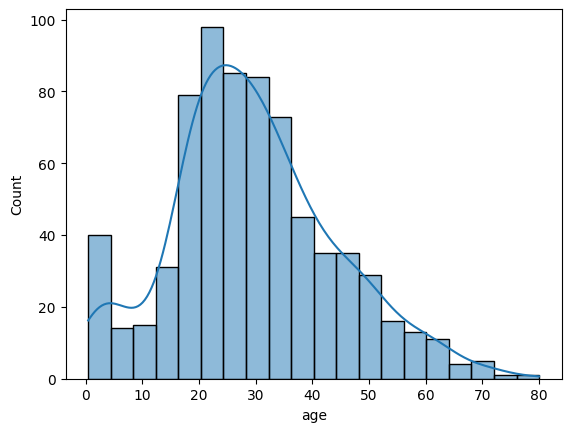

In [84]:
# distribución de la edad (age)
sns.reset_orig()
sns.histplot(titanic.age.dropna(), kde=True)
plt.show()

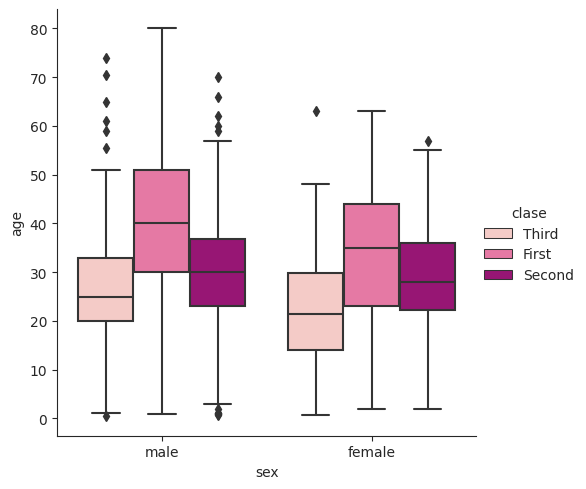

In [85]:
# BoxPlot de la edad por sexo y clase
sns.set_palette("RdPu", n_colors=3)
with sns.axes_style(style='ticks'):
  ax = sns.catplot(data=titanic, x="sex", y="age", hue="clase", kind="box")

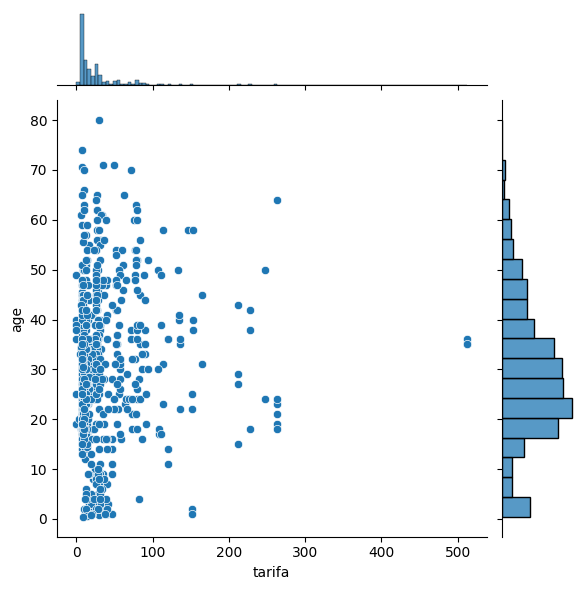

In [86]:
# distribución cruzada de Edad y Tarifa
sns.reset_orig()
sns.jointplot(x='tarifa',y='age',data=titanic)

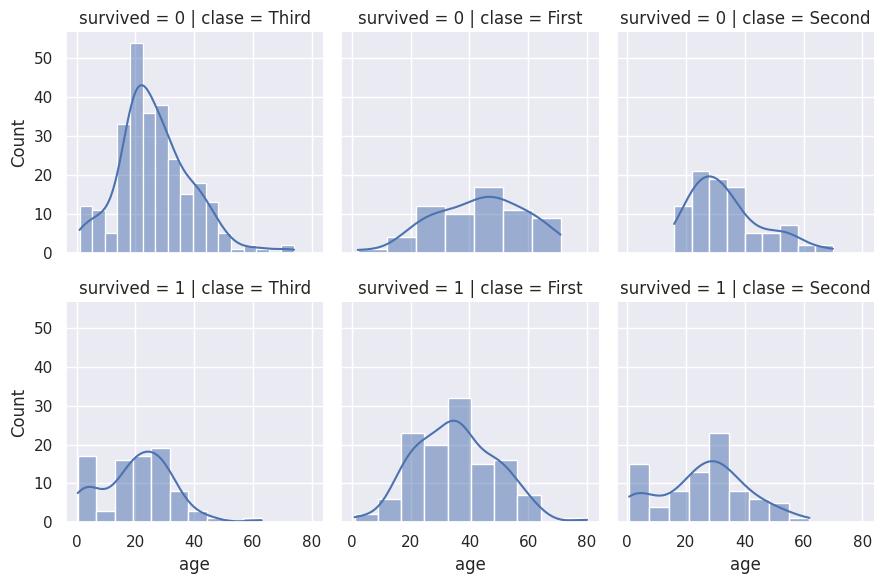

In [87]:
# cambiamos el font
sns.set(font_scale=1)
# facetGrid - Construir una matriz de gráficos
g = sns.FacetGrid(titanic, row='survived',col='clase')
g.map(sns.histplot, "age", kde=True)
plt.show()

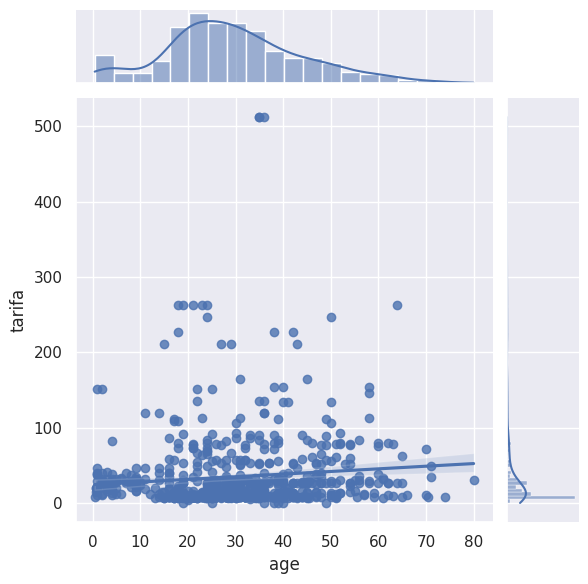

In [88]:
# diagrama de dispersion con distribucion de cada
# variable: fare(precio)/age(edad)
sns.jointplot(data=titanic, x='age', y='tarifa', kind='reg', color='b')
plt.show()

<ipython-input-89-32ccd2e056c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tc = titanic.corr()


Text(0.5, 1.0, 'titanic.corr()')

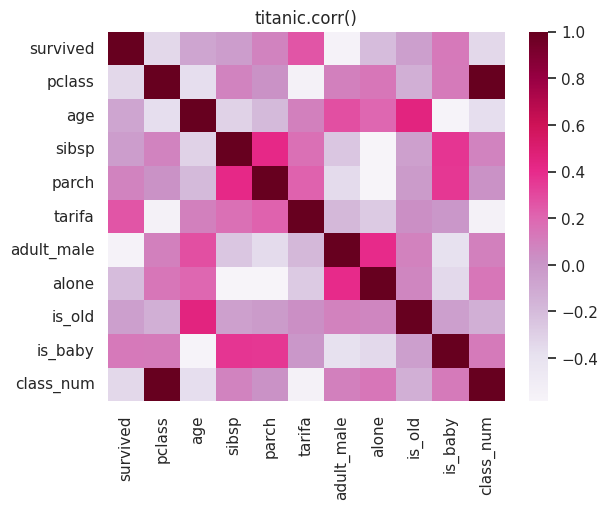

In [89]:
tc = titanic.corr()
sns.heatmap(tc,cmap="PuRd")
plt.title('titanic.corr()')

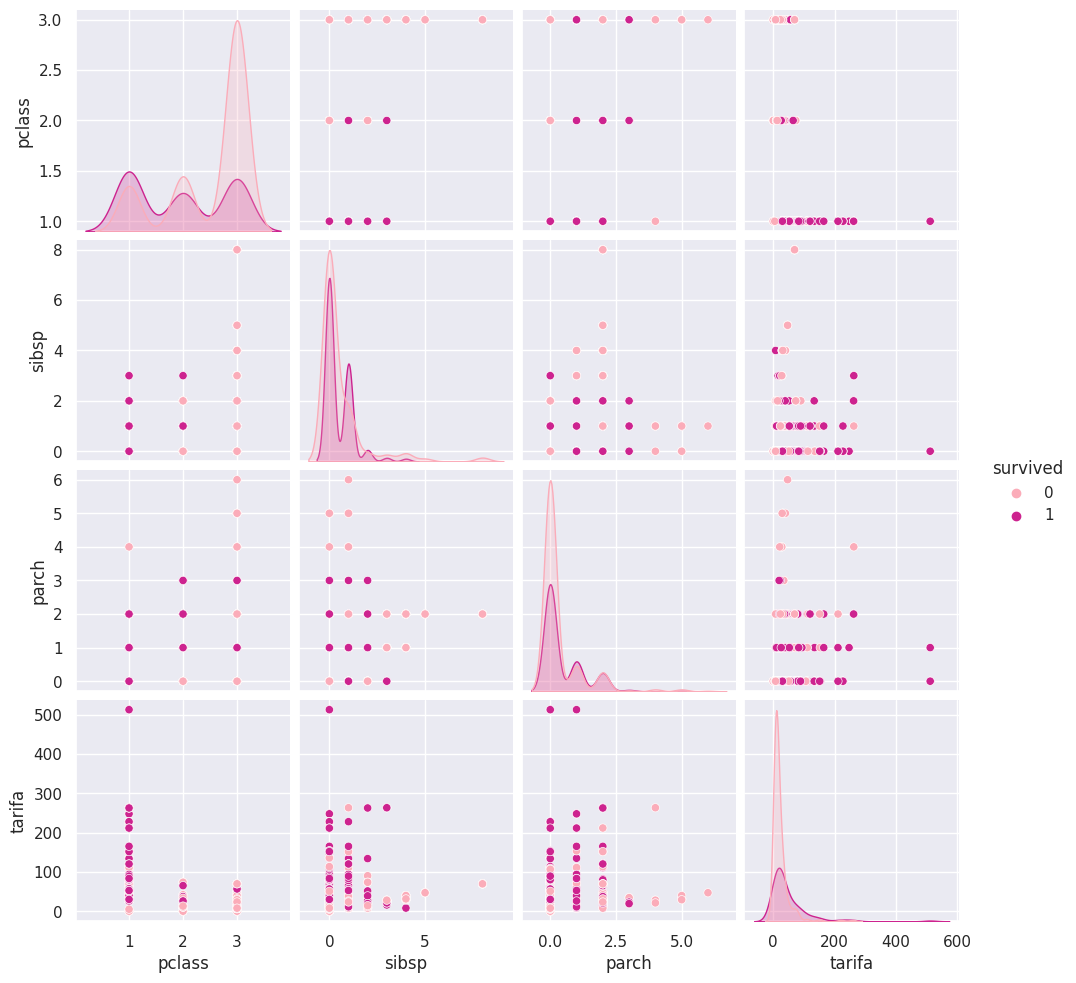

In [90]:
# define un subconjuto de datos con las variables numéricas
titanic_num = titanic[['survived','pclass','sibsp','parch','tarifa']]
# hace una matriz de diagramas de dispersión de parejas de variables
sns.set_palette("RdPu", n_colors=2)
sns.pairplot(titanic_num, hue="survived")
plt.show()

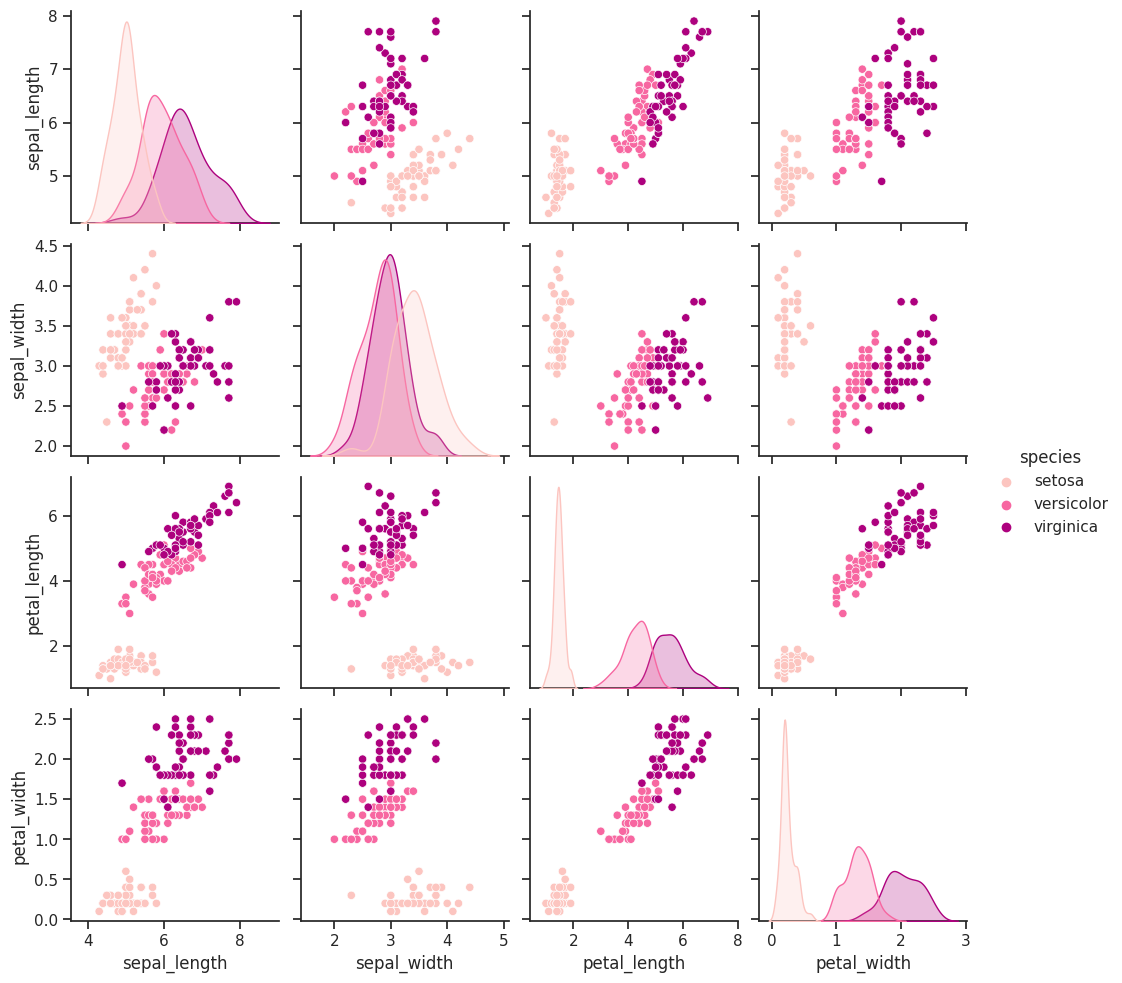

In [91]:
# establece el estilo estético de las tramas
sns.set(style="ticks")
sns.set_palette("RdPu", n_colors=3)
# carga el data set
df = sns.load_dataset("iris")
# matriz de diagramas de dispersion
sns.pairplot(df, hue="species")

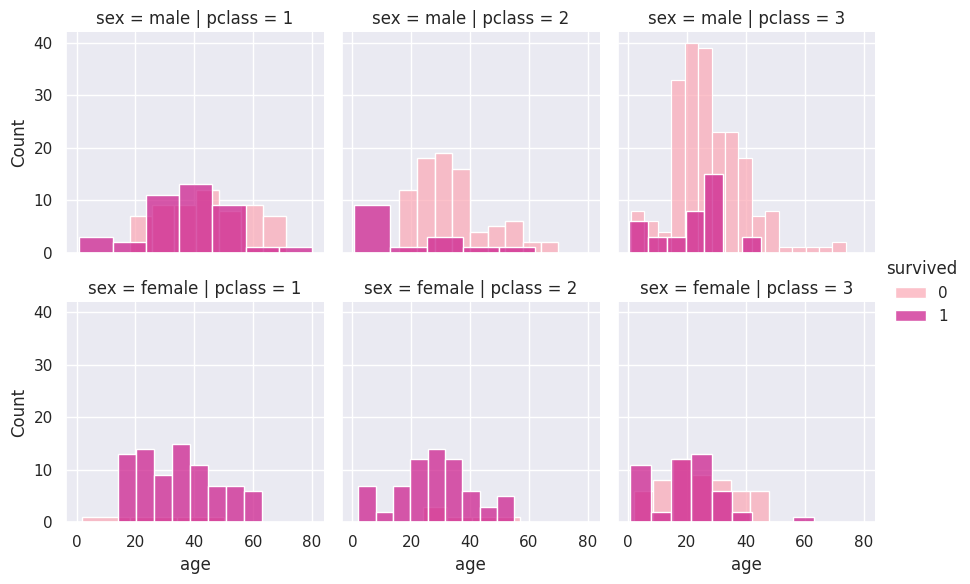

In [99]:
# ampliación de la práctica
sns.set_theme()
sns.set_palette("RdPu", n_colors=2)
g = sns.FacetGrid(titanic, row='sex',col='pclass', hue='survived')
g.map(sns.histplot, "age")
g.add_legend()
plt.show()